In [ ]:
import sys
sys.path.append('../')
%matplotlib inline
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np
from matplotlib import colors
from matplotlib.colors import hsv_to_rgb

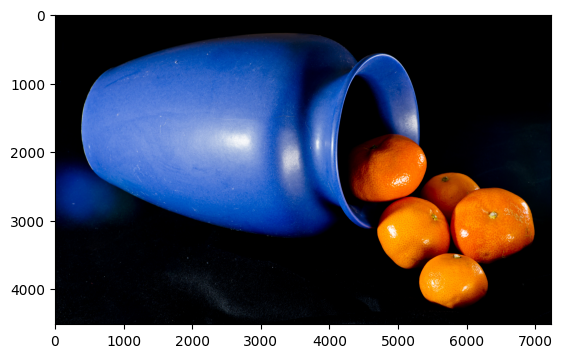

In [ ]:
image = cv.imread('/content/blue-orange.jpg')
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.show()

In [ ]:
image_hsv = cv.cvtColor(image_rgb, cv.COLOR_RGB2HSV)

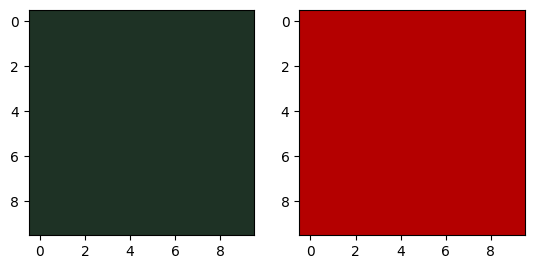

In [59]:
lower_blue = np.array([100,100,50])
upper_blue = np.array([255,255,180])
lo_square = np.full((10, 10, 3), lower_blue, dtype=np.uint8) / 255.0
do_square = np.full((10, 10, 3), upper_blue, dtype=np.uint8) / 255.0

plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(lo_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(do_square))
plt.show()

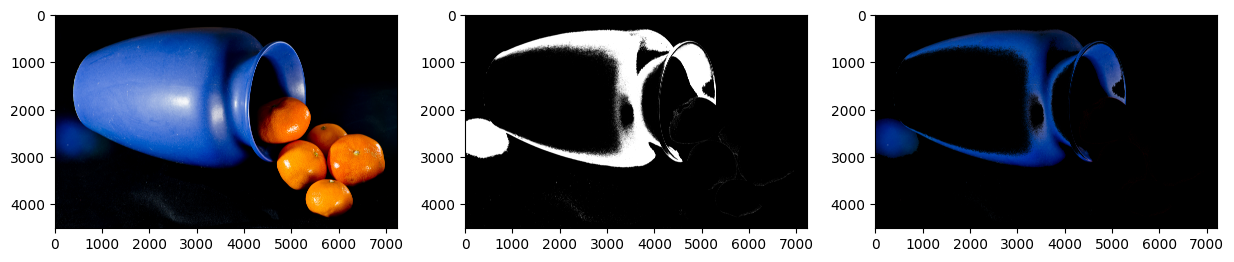

In [ ]:
mask = cv.inRange(image_hsv, lower_blue, upper_blue)
result = cv.bitwise_and(image_rgb, image_rgb, mask=mask)

plt.figure(figsize=(15,20))
plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.subplot(1, 3, 2)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 3, 3)
plt.imshow(result)
plt.show()

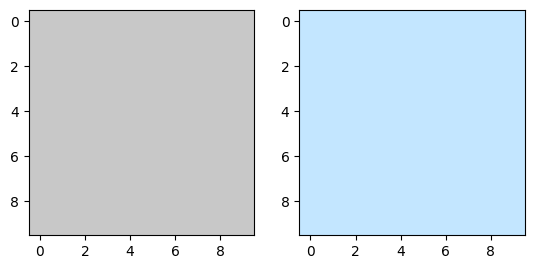

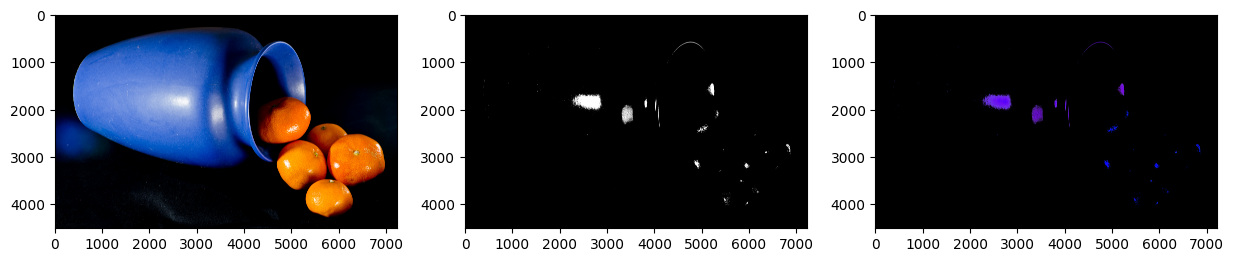

In [ ]:
light_white = (0, 0, 200)
dark_white = (145, 60, 255)

lw_square = np.full((10, 10, 3), light_white, dtype=np.uint8) / 255.0
dw_square = np.full((10, 10, 3), dark_white, dtype=np.uint8) / 255.0

plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(lw_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(dw_square))
plt.show()

mask_white = cv.inRange(image_hsv, light_white, dark_white)
result_white = cv.bitwise_and(image_hsv, image_hsv, mask=mask_white)
plt.figure(figsize=(15,20))

plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.subplot(1, 3, 2)
plt.imshow(mask_white, cmap="gray")
plt.subplot(1, 3, 3)
plt.imshow(result_white)
plt.show()

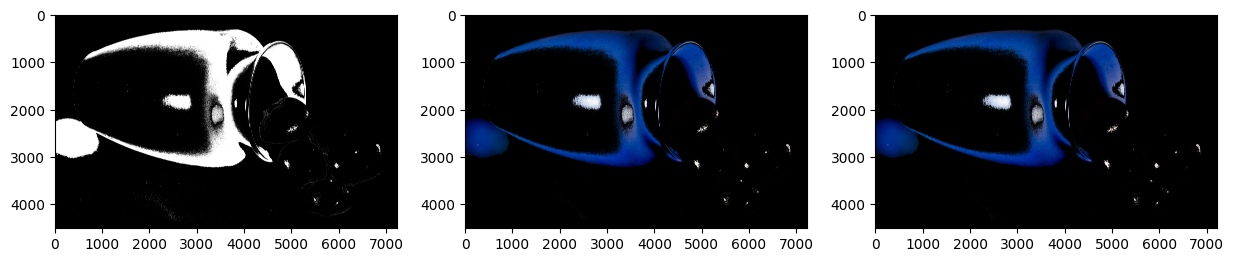

In [ ]:
final_mask = mask + mask_white

final_result = cv.bitwise_and(image_rgb, image_rgb, mask=final_mask)
blur = cv.GaussianBlur(final_result, (7, 7), 0)

plt.figure(figsize=(15,20))
plt.subplot(1, 3, 1)
plt.imshow(final_mask, cmap="gray")
plt.subplot(1, 3, 2)
plt.imshow(final_result)
plt.subplot(1, 3, 3)
plt.imshow(blur)
plt.show()

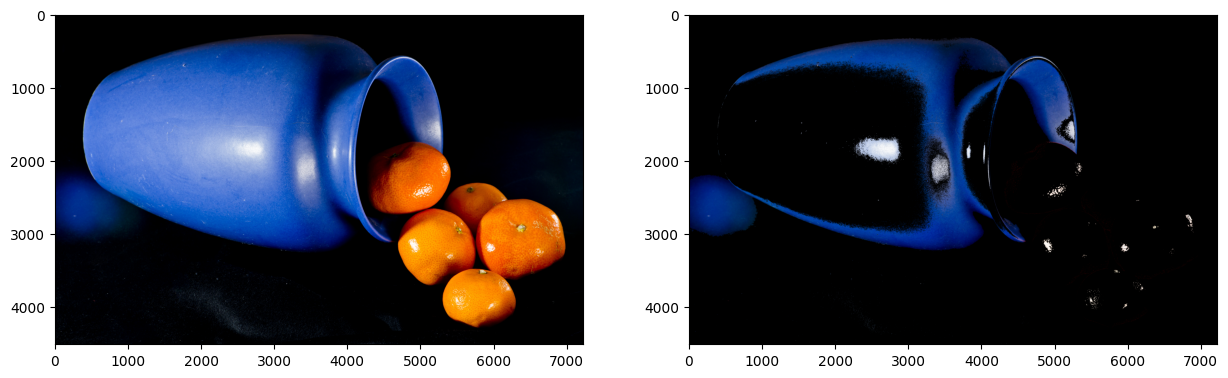

In [60]:
def segment_image(image):
    ''' Attempts to segment the whale out of the provided image '''

    # Convert the image into HSV
    hsv_image = cv.cvtColor(image, cv.COLOR_RGB2HSV)

    # Set the blue range
    lower_blue = (100, 100, 50)
    upper_blue = (255, 255, 180)

    # Apply the blue mask
    mask = cv.inRange(hsv_image, lower_blue, upper_blue)

    # Set a white range
    light_white = (0, 0, 200)
    dark_white = (145, 60, 255)

    # Apply the white mask
    mask_white = cv.inRange(hsv_image, light_white, dark_white)

    # Combine the two masks
    final_mask = mask + mask_white
    result = cv.bitwise_and(image, image, mask=final_mask)

    # Clean up the segmentation using a blur
    blur = cv.GaussianBlur(result, (7, 7), 0)
    return blur


result = segment_image(image_rgb)

plt.figure(figsize=(15,20))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()